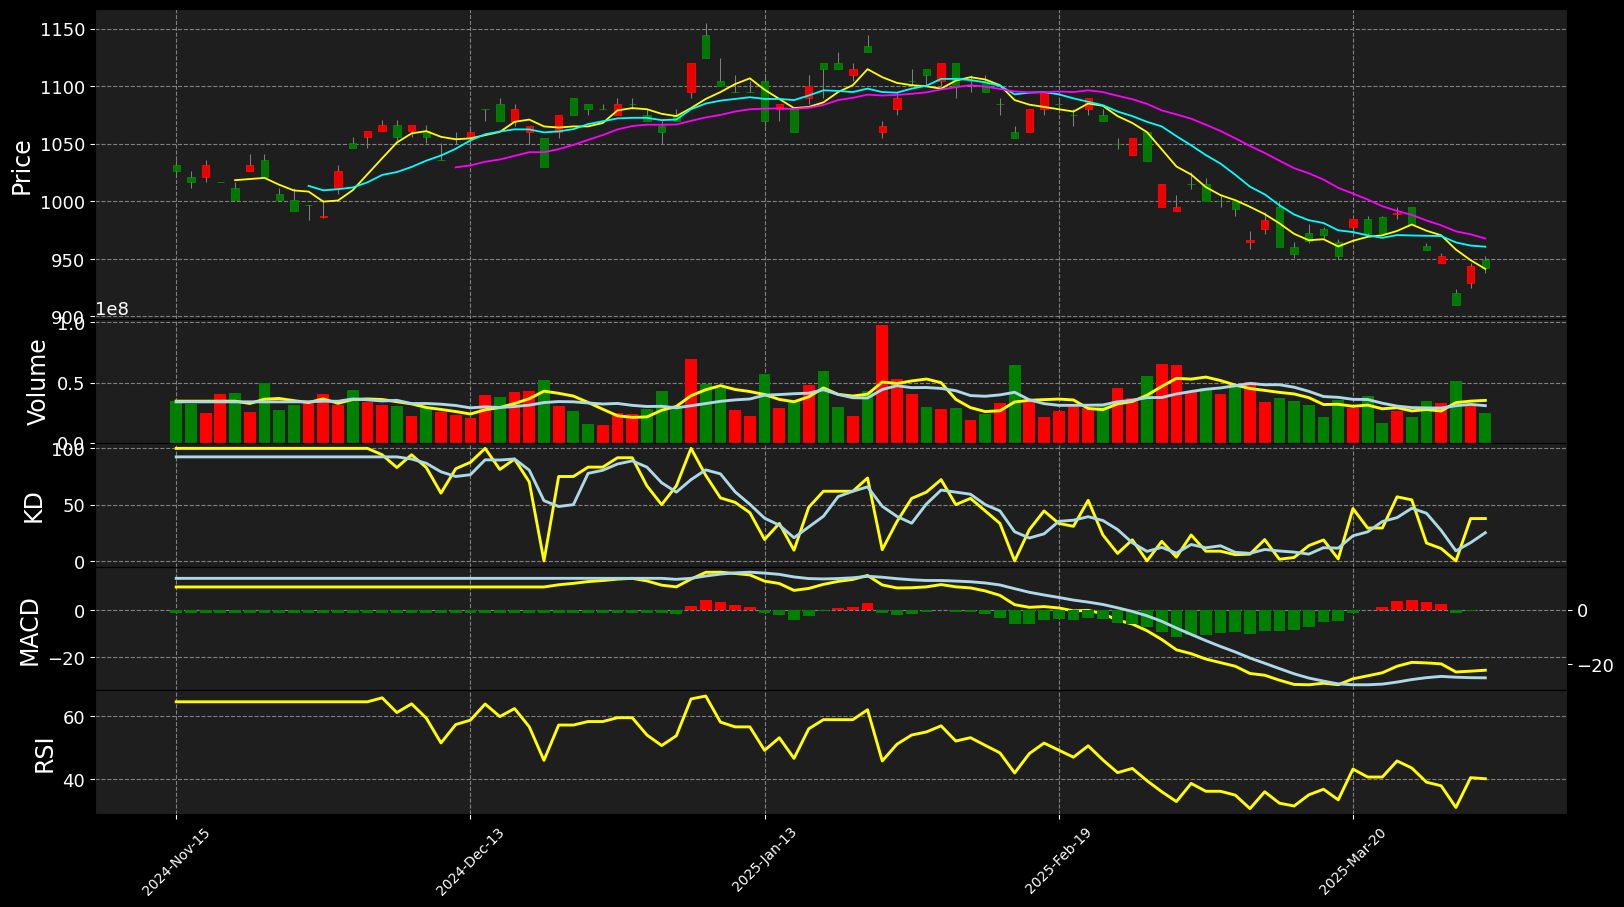

In [129]:
import pandas as pd
import numpy as np
import mplfinance as mpf

df = pd.read_csv('../data/processed/TSMC_2330TW_90d.csv', index_col='Date', parse_dates=True)

volume_colors = np.where(df['Close'] >= df['Open'], 'red', 'green')
macd_colors   = ['red' if val >= 0 else 'green' for val in df['MACD_diff']]

apds = [
    # Create a volume moving average layer (drawn in the volume panel, that is, panel=1)
    mpf.make_addplot(df['Volume'], panel=1, type='bar', color=volume_colors, ylabel='Volume'),
    mpf.make_addplot(df['Vol_ma_5'], panel=1, color='yellow'),
    mpf.make_addplot(df['Vol_ma_10'], panel=1, color='lightblue'),

    mpf.make_addplot(df['K'], panel=2, color='yellow', ylabel='KD'),
    mpf.make_addplot(df['D'], panel=2, color='lightblue'),

    mpf.make_addplot(df['MACD'], panel=3, color='yellow', ylabel='MACD'),
    mpf.make_addplot(df['MACD_signal'], panel=3, color='lightblue'),
    mpf.make_addplot(df['MACD_diff'], type='bar', panel=3, color=macd_colors),

    mpf.make_addplot(df['RSI_14'], panel=4, color='yellow', ylabel='RSI'),
]

Kstyle = mpf.make_mpf_style(
    base_mpf_style='nightclouds',
    rc={'axes.labelsize': 17, 'ytick.labelsize': 13},
    marketcolors=mpf.make_marketcolors(
        up='red', down='green',
        edge='inherit',
        wick='gray',
        volume='inherit',
    ),
    facecolor='#1e1e1e',  # Background dark gray
    edgecolor='black',
    gridcolor='gray',
)

mpf.plot(
    df,
    type='candle',
    style=Kstyle,
    mav=(5, 10, 20),
    mavcolors=['yellow', 'cyan', 'magenta'],
    addplot=apds,
    figratio=(16, 9), figscale=2,
    volume=False
)

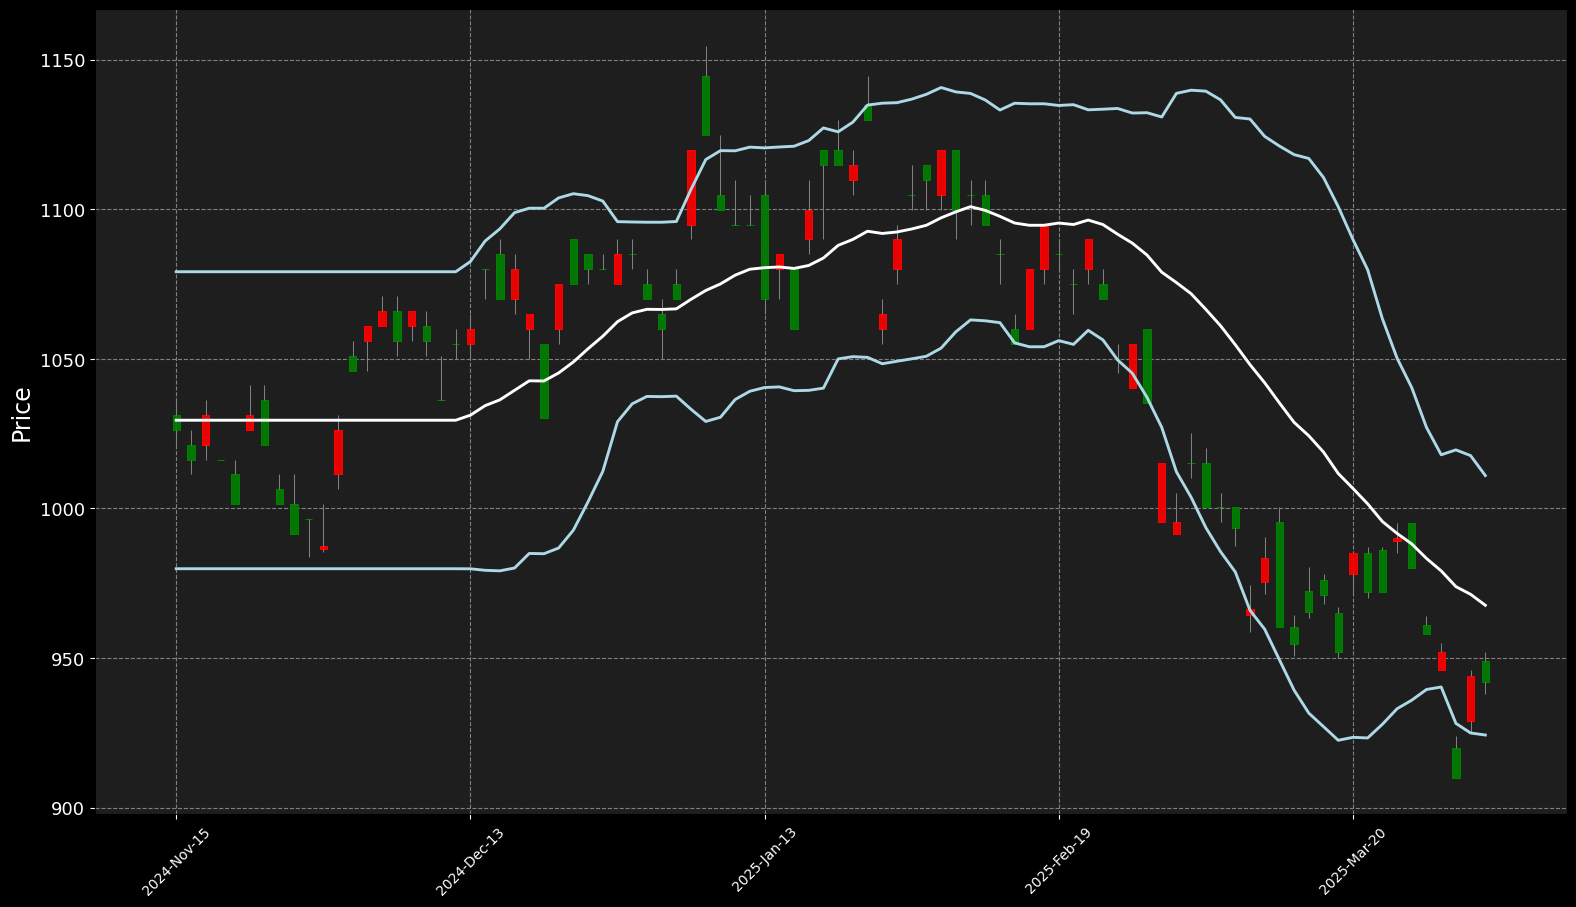

In [130]:
import pandas as pd
import numpy as np
import mplfinance as mpf

df = pd.read_csv('../data/processed/TSMC_2330TW_90d.csv', index_col='Date', parse_dates=True)

apds = [
    mpf.make_addplot(df['bollinger_upper'], color='lightblue'),
    mpf.make_addplot(df['bollinger_mavg'], color='white'),
    mpf.make_addplot(df['bollinger_lower'], color='lightblue')
]

Kstyle = mpf.make_mpf_style(
    base_mpf_style='nightclouds',
    rc={'axes.labelsize': 17, 'ytick.labelsize': 13},
    marketcolors=mpf.make_marketcolors(
        up='red', down='green',
        edge='inherit',
        wick='gray',
        volume='inherit',
    ),
    facecolor='#1e1e1e',  # Background dark gray
    edgecolor='black',
    gridcolor='gray',
)

mpf.plot(
    df,
    type='candle',
    style=Kstyle,
    addplot=apds,
    figratio=(16, 9), figscale=2,
    volume=False
)